In [1]:
import sys
sys.path.append('aux/modules')
import cf_data, cf_plot, cf_radar

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')

from IPython.display import Image

%matplotlib inline
plt.style.use('aux/mpl-styles/dark.mplstyle')

In [2]:
pdMajorManufacturers = cf_data.getLimitedData(lowerBound = 6)

In [3]:
pdNormalized = pdMajorManufacturers.copy()
pdNormalized.rename(
    columns = {
        'city mpg': 'mpg_city',
        'highway mpg': 'mpg_highway',
        'horsepower': 'horse_power'
    }, 
    inplace = True
)

In [4]:
cf_data.normalizeColumns(['mpg_city', 'mpg_highway', 'horse_power'], pdNormalized)

In [5]:
cf_data.normalizeColumnsInverted(['price', 'weight', 'riskiness', 'losses'], pdNormalized)

### Creating Layers (Without Data)

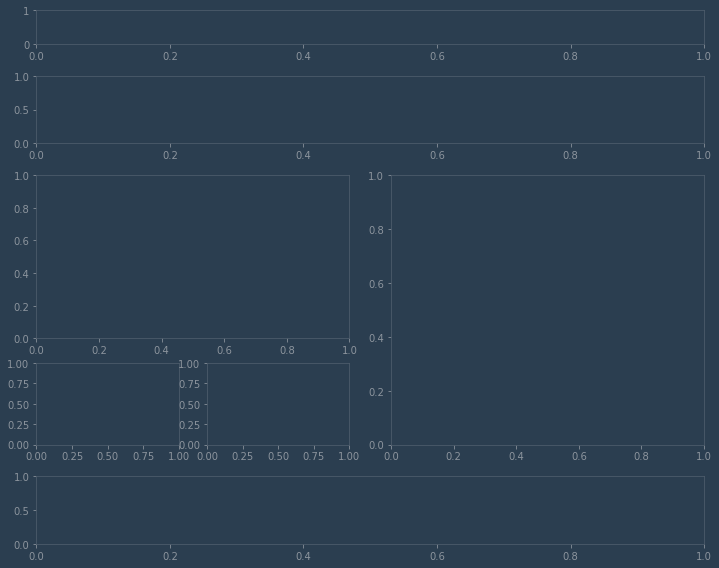

In [6]:
figure = plt.figure(figsize = (10, 8))
gridSpecMaster = mpl.gridspec.GridSpec(4, 2, height_ratios = [1, 2, 8, 2])

# Layer 01 - Title
gridSpec01 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[0, :])
axesTitle = figure.add_subplot(gridSpec01[0])

# Layer 2 - Price
gridSpec02 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[1, :])
axesPrices = figure.add_subplot(gridSpec02[0])

# Layer 3.1 - Risks
gridSpec0301 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios = [2, 1], subplot_spec = gridSpecMaster[2, :1])
axesRiskAndLoss = figure.add_subplot(gridSpec0301[0, :])
axesRisk = figure.add_subplot(gridSpec0301[1, :1])
axesLoss = figure.add_subplot(gridSpec0301[1:, 1])

# Layer 3.2 - Radar
gridSpec0302 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[2, 1])
axesRadar = figure.add_subplot(gridSpec0302[0])

# Layer 4 - MPG
gridSpec04 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[3, :])
axesMpg = figure.add_subplot(gridSpec04[0])

# Layer Join
gridSpecMaster.tight_layout(figure)
plt.show()

### Dashboard Creation

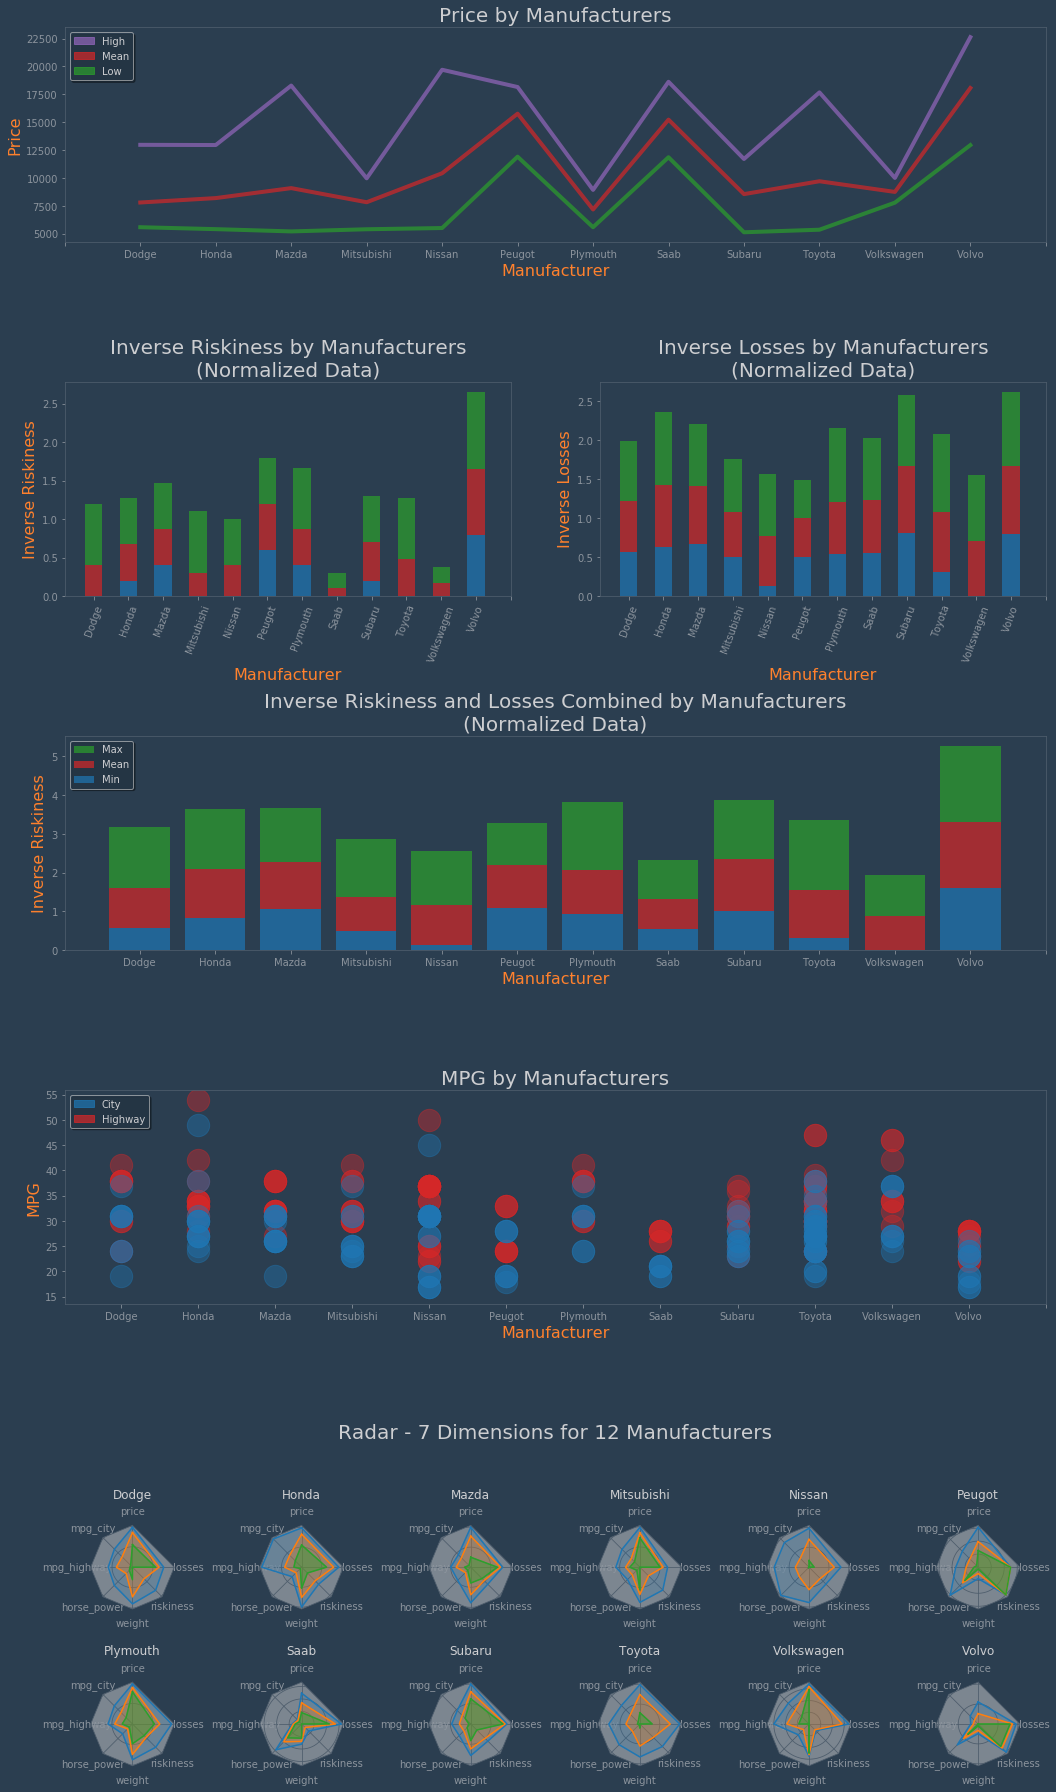

In [7]:
figure = plt.figure(figsize = (15, 25))
gridSpecMaster = mpl.gridspec.GridSpec(5, 2, height_ratios = [100, 100, 100, 100, 150], hspace = 0, wspace = 0)

# Layer 01 - priceByManufacturer
gridSpec01 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[0, :])

axes = figure.add_subplot(gridSpec01[0])
cf_plot.priceByManufacturer(figure, pdData = pdMajorManufacturers, axes = axes)

# Layer 02 - inverseRiskinessByManufacturer and inverseLossesByManufacturer
gridSpec02 = mpl.gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = gridSpecMaster[1, :])

axes = figure.add_subplot(gridSpec02[0, 0])
cf_plot.inverseRiskinessByManufacturer(figure, pdData = pdNormalized, axes = axes, legend = False, rotateTicks = True)

axes = figure.add_subplot(gridSpec02[0, 1])
cf_plot.inverseLossesByManufacturer(figure, pdData = pdNormalized, axes = axes,legend = False, rotateTicks = True)

# Layer 03 - inverseRiskinessAndLossesCombinedByManufacturer
gridSpec03 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[2, :])

axes = figure.add_subplot(gridSpec03[0])
cf_plot.inverseRiskinessAndLossesCombinedByManufacturer(figure, pdData = pdNormalized, axes = axes)

# Layer 04 - mpgByManufacturer
gridSpec04 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gridSpecMaster[3, :])

axes = figure.add_subplot(gridSpec04[0])
cf_plot.mpgByManufacturer(figure, pdData = pdMajorManufacturers, axes = axes)

# Layer 05 - radarByManufacturer

gridSpec05 = mpl.gridspec.GridSpecFromSubplotSpec(
    3, 6, 
    height_ratios = [1, 10, 10], 
    wspace = 0.25, 
    hspace = 1.25, 
    subplot_spec = gridSpecMaster[4, :])

(rows, cols) = geometry = gridSpec05.get_geometry()
title_axes = figure.add_subplot(gridSpec05[0, :])
inner_axes = []
projection = cf_radar.RadarAxes(spokeCount = len(pdNormalized.groupby("manufacturer").mean().columns))
[inner_axes.append(figure.add_subplot(m, projection = projection)) for m in [n for n in gridSpec05][cols:]]
cf_plot.radarByManufacturer(
    figure, 
    pdData = pdNormalized, 
    titleAxes = title_axes, 
    innerAxes = inner_axes, 
    legendAxes = False, 
    geometry = geometry)

# Layer Join
gridSpecMaster.tight_layout(figure)
plt.show()